## Basic ML Solutions in PyTorch
# Classification Algorithim using Custom NN
#### Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
titanic = pd.read_csv('titanic_data/train.csv')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C


In [3]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare
731,0,3,male,11.0,18.7875
395,0,3,male,22.0,7.7958
84,1,2,female,17.0,10.5000
789,0,1,male,46.0,79.2000
201,0,3,male,NaN,69.5500


In [4]:
titanic = titanic.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'])

In [6]:
x = titanic.drop('Survived', axis=1)
y = titanic[['Survived']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

X_train = torch.from_numpy(x_train.values).float()
X_test = torch.from_numpy(x_test.values).float()

Y_train = torch.from_numpy(y_train.values).view(1, -1)[0]
Y_test = torch.from_numpy(y_test.values).view(1, -1)[0]
# converting (size, 1) tensor to (size) tensor

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
inp = X_train.shape[1]
out = 2
hidd = 10

In [9]:
# Build our own custom NN module(Net), by subclassing the nn.Module class

class Net(nn.Module):
    # within init func, we call the super class - allows us to initialize our NN before adding in layers
    def __init__(self):
        super(Net, self).__init__()
        # super keyword allows the derived class to access the parent class’s init() property
        
        # instantiate 3 fully connected layers
        self.fc1 = nn.Linear(inp, hidd)
        self.fc2 = nn.Linear(hidd, hidd)
        self.fc3 = nn.Linear(hidd, out)
        
        # need to override the forward function of base nn.module class
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
            
        return F.log_softmax(x, dim=-1) # dim=-1 merges N-D tensors to single 1-D tensor

In [10]:
# let's instantiate this network by calling the Net class
model = Net()

In [11]:
# optimizer will update our model's parameters which is why it needs it as an input argument

optimizer = torch.optim.Adam(model.parameters())

# Set up the loss function as NLLLoss

loss_fn = nn.NLLLoss()

In [12]:
# to store each epoch related data
epoch_data = []
epochs = 1001

for epoch in range(1, epochs):
    
    optimizer.zero_grad()
    
    # configure model to training phase
    model.train()
    
    Y_pred = model(X_train)
    loss = loss_fn(Y_pred, Y_train)
    
    loss.backward()
    optimizer.step()
    
    # For every epoch, calculate the loss on test data as well to check how model performs on test data
    
    # configure model to evaluation phase
    model.eval()
    
    y_pred_test = model(X_test)
    loss_test = loss_fn(y_pred_test, Y_test)
    
    # find the value with the highest probability -> our predicted value
    _, pred = y_pred_test.data.max(1)
    
    # eq -> equal
    accuracy = pred.eq(Y_test.data).sum().item() / y_test.values.size
    
    # store all these data in epoch_data list
    
    # item -> converts 1 element tensors to scalars
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if(epoch % 100 == 0):
        print('Epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f' %(
            epoch, epoch/epochs*100, loss.data.item(), loss_test.data.item(), accuracy))      

C:\Users\PK068160\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch - 100 (9%) train loss - 0.65 test loss - 0.66 accuracy - 0.5594
Epoch - 200 (19%) train loss - 0.61 test loss - 0.61 accuracy - 0.6783
Epoch - 300 (29%) train loss - 0.59 test loss - 0.59 accuracy - 0.6783
Epoch - 400 (39%) train loss - 0.57 test loss - 0.56 accuracy - 0.6853
Epoch - 500 (49%) train loss - 0.54 test loss - 0.54 accuracy - 0.7133
Epoch - 600 (59%) train loss - 0.51 test loss - 0.50 accuracy - 0.7832
Epoch - 700 (69%) train loss - 0.48 test loss - 0.47 accuracy - 0.8042
Epoch - 800 (79%) train loss - 0.46 test loss - 0.45 accuracy - 0.7972
Epoch - 900 (89%) train loss - 0.44 test loss - 0.43 accuracy - 0.7972
Epoch - 1000 (99%) train loss - 0.43 test loss - 0.43 accuracy - 0.7972


In [13]:
epoch_df = pd.DataFrame(epoch_data, columns=['epoch', 'train_loss', 'test_loss', 'accuracy'])
epoch_df.head()

,epoch,train_loss,test_loss,accuracy
0,1,0.735060,0.722472,0.440559
1,2,0.732752,0.720788,0.440559
2,3,0.730488,0.719148,0.440559
3,4,0.728266,0.717553,0.440559
4,5,0.726091,0.716003,0.440559


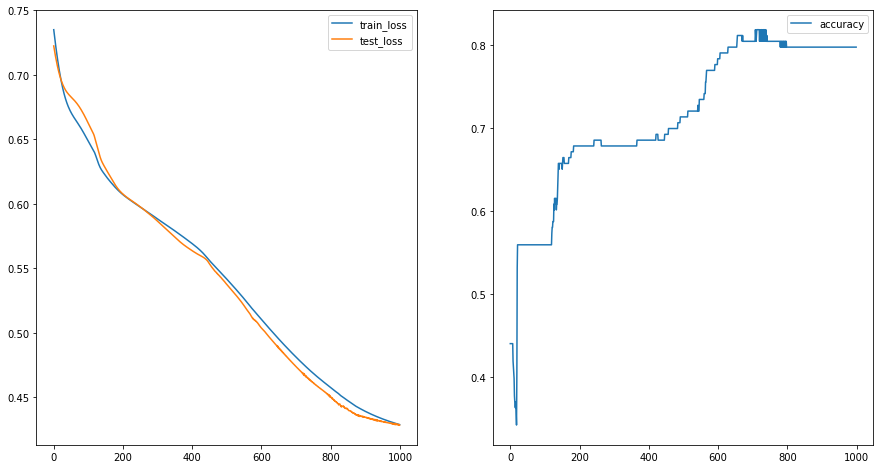

In [15]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
epoch_df[['train_loss', 'test_loss']].plot(ax=ax1)
epoch_df[['accuracy']].plot(ax=ax2)
plt.show()